In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
import requests
import seaborn as sns

In [2]:
cd "C:\Users\Andre\Videos\mlclass-master\03_Validation"

C:\Users\Andre\Videos\mlclass-master\03_Validation


In [3]:
data = pd.read_csv('abalone_dataset.csv')
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,M,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,I,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,I,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,M,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,I,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1


In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
new_sex = encoder.fit_transform(data.sex)

data_with_encoded_sex = data.copy()
data_with_encoded_sex['sex'] = new_sex
data_with_encoded_sex.head(3)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,2,0.535,0.42,0.150,0.6995,0.2575,0.1530,0.2400,3
1,1,0.510,0.38,0.115,0.5155,0.2150,0.1135,0.1660,1
2,1,0.185,0.13,0.045,0.0290,0.0120,0.0075,0.0095,1


<h1>Correlation between variables </h1>
</br>
Deleted variables: sex (low correlation), whole_weight,viscera_weight (high correlation with <strong>shell_weight</strong>)

In [5]:
data_with_encoded_sex.corr()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
sex,1.000000,-0.026521,-0.029353,-0.030344,-0.009325,0.012464,-0.018009,-0.023907,-0.040599
length,-0.026521,1.000000,0.987063,0.891287,0.924125,0.895178,0.901025,0.895045,0.582482
diameter,-0.029353,0.987063,1.000000,0.898236,0.925135,0.891759,0.898265,0.902889,0.597654
height,-0.030344,0.891287,0.898236,1.000000,0.883098,0.832339,0.859120,0.880513,0.607524
whole_weight,-0.009325,0.924125,0.925135,0.883098,1.000000,0.969027,0.966725,0.954062,0.580626
shucked_weight,0.012464,0.895178,0.891759,0.832339,0.969027,1.000000,0.930324,0.879352,0.491211
viscera_weight,-0.018009,0.901025,0.898265,0.859120,0.966725,0.930324,1.000000,0.905025,0.564292
shell_weight,-0.023907,0.895045,0.902889,0.880513,0.954062,0.879352,0.905025,1.000000,0.630489
type,-0.040599,0.582482,0.597654,0.607524,0.580626,0.491211,0.564292,0.630489,1.000000


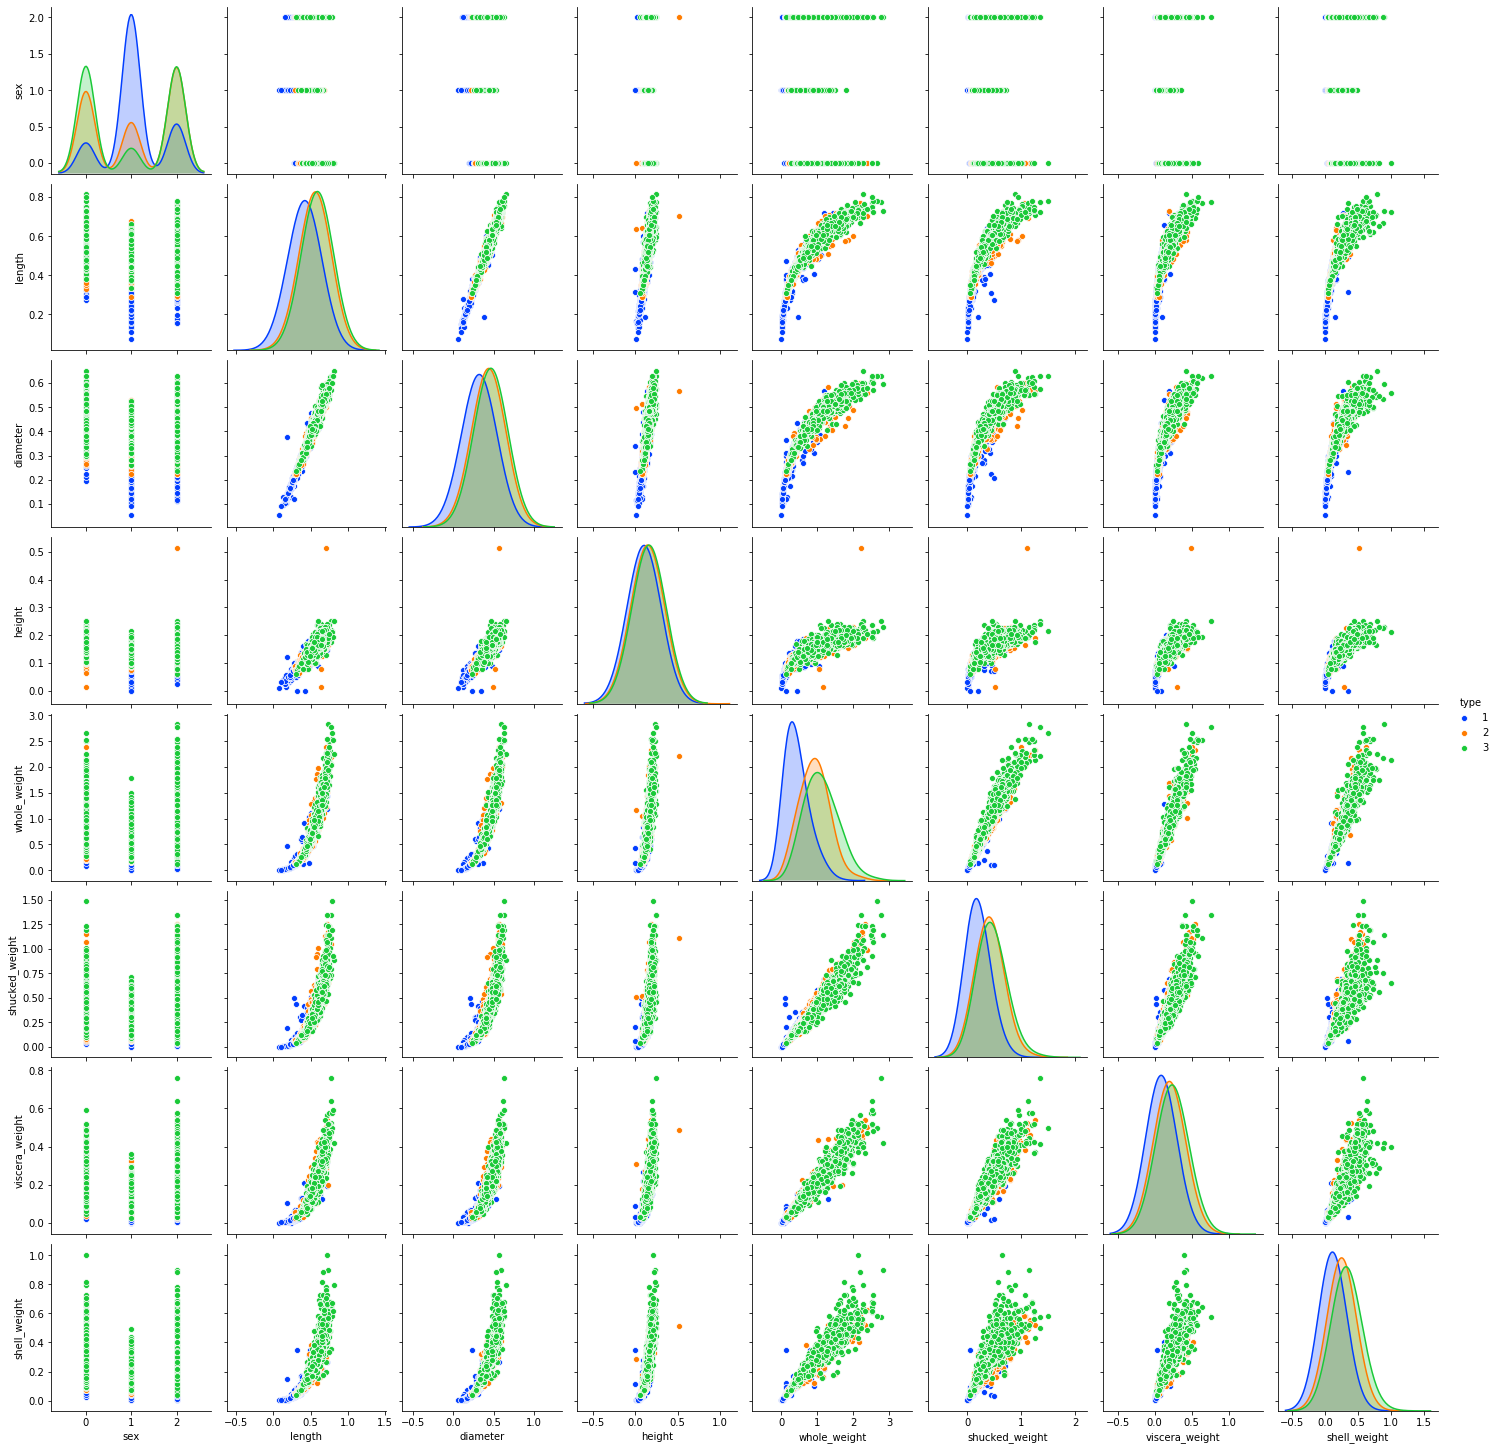

In [6]:
sns.pairplot(data_with_encoded_sex,hue='type',diag_kws={'bw': 0.2},palette='bright')
plt.show()

<h1> Features Selection </h1>

In [6]:
use_cols = ['diameter', 'height', 'whole_weight', 'shucked_weight','viscera_weight', 'shell_weight', 'type']
data = data[use_cols]
data.head(5)

,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1


<h1>Data split</h1>

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data.drop('type',axis=1),data.type,test_size=0.1,random_state=42)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(2818, 6) (314, 6)
(2818,) (314,)


<h1>Preprocessing</h1>

In [11]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

<h1>Hyperparameters Selection</h1>

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

def get_neighbors(n):
    
    neigh = []
    neigh.append(n+2)
    neigh.append(n+1)
    neigh.append(1 if n-2 < 1 else n-2)
    neigh.append(1 if n-1 < 1 else n-1)
    neigh.append(np.random.randint(5,100))
    return neigh

def hill_climbing(n,iterations):
    
    best_n = None
    best_score = 0
    
    for i in tqdm(range(iterations)):
        for _n in get_neighbors(n):
            knn = KNeighborsClassifier(n_neighbors=_n)
            knn.fit(x_train,y_train)
            score = knn.score(x_test,y_test)
            if score > best_score:
                best_n = _n
                best_score = score
                
        n = best_n
    
    return best_n,best_score
    

In [118]:
_n = np.random.randint(1,100)
n,score = hill_climbing(_n,1000)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:01<00:00,  2.37it/s]


In [119]:
print('Best_n = {},Best_score= {}'.format(n,score))

Best_n = 20,Best_score= 0.6592356687898089


<h1>Define Model</h1>

In [12]:
#from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

<h1>Model Valitation</h1>

In [13]:
knn.score(x_test,y_test)

0.6592356687898089

<h1>Model Predict</h1>

In [128]:
use_cols_test =['diameter', 'height', 'whole_weight', 'shucked_weight','viscera_weight', 'shell_weight'] 
data_test = pd.read_csv('abalone_app.csv')
data_test = data_test[use_cols_test]

data_app = 
data_test.head(5)

,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,0.480,0.175,1.2290,0.4125,0.2735,0.4150
1,0.385,0.150,1.1185,0.5425,0.2445,0.2845
2,0.520,0.180,1.2850,0.5775,0.3520,0.3170
3,0.510,0.170,1.3715,0.5670,0.3070,0.4090
4,0.540,0.215,1.5555,0.6950,0.2960,0.4440


In [129]:
y_pred = clf.predict(data_test)

ValueError: X.shape[1] = 6 should be equal to 4, the number of features at training time

<h1>Submit predicted values</h1>

In [29]:
# Enviando previsões realizadas com o modelo para o servidor
URL = 'https://aydanomachado.com/mlclass/03_Validation.php'

#TODO Substituir pela sua chave aqui
DEV_KEY = "Andre Santos"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")

 - Resposta do servidor:
 {"error":{"code":102,"message":"Espere ao menos 12 horas entre dois envios, tempo restante 00 dias 11 horas 59 minutos 47 segundos"}} 

